# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [9]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(q="Bitcoin",language="en")

# Show the total number of news
print(f"Total articles about Bitcoin: {bitcoin_news_en['totalResults']}")

# Show sample article
bitcoin_news_en["articles"][0]

Total articles about Bitcoin: 6478


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Paul Ford',
 'title': 'A Field Guide for Nature-Resistant Nerds',
 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
 'publishedAt': '2021-08-06T11:00:00Z',
 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

In [10]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(q="Ethereum",language="en")

# Show the total number of news
print(f"Total articles about Ethereum: {ethereum_news_en['totalResults']}")

# Show sample article
ethereum_news_en["articles"][0]

Total articles about Ethereum: 2960


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Offchain Labs raises $120 million to hide Ethereum’s shortcomings with its Arbitrum product',
 'description': 'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized apps on the Ethereum blockchain. The popular network has see…',
 'url': 'http://techcrunch.com/2021/08/31/offchain-labs-raises-120-million-to-hide-ethereums-shortcomings-with-arbitrum-scaling-product/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/08/Image-from-iOS-5.jpg?w=533',
 'publishedAt': '2021-08-31T12:30:39Z',
 'content': 'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized … [+3414 chars]'}

In [12]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            "date": date,
         })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [13]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-31,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.0,0.833
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902
3,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839
4,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861


In [14]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.162885,0.071100,0.033500,0.895400
std,0.447308,0.065972,0.068998,0.071897
min,-0.886000,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.846000
50%,0.138950,0.066500,0.000000,0.904500
75%,0.525925,0.108250,0.043000,0.924750
max,0.718400,0.200000,0.271000,1.000000


In [15]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.175475,0.06820,0.026400,0.905350
std,0.414882,0.06409,0.072668,0.078087
min,-0.893400,0.00000,0.000000,0.688000
25%,0.000000,0.00000,0.000000,0.859500
50%,0.226300,0.06200,0.000000,0.920000
75%,0.445000,0.10750,0.000000,0.953250
max,0.735100,0.19000,0.312000,1.000000


In [16]:
btc_positive_mean=round(bitcoin_df.positive.mean(),3)
eth_positive_mean=round(ethereum_df.positive.mean(),3)
btc_compound_mean=round(bitcoin_df.compound.mean(),3)
eth_compound_mean=round(ethereum_df.compound.mean(),3)
btc_compound_max=round(bitcoin_df.compound.max(),3)
eth_compound_max=round(ethereum_df.compound.max(),3)
btc_positive_max=round(bitcoin_df.positive.max(),3)
eth_positive_max=round(ethereum_df.positive.max(),3)

### Questions:

Q: Which coin had the highest mean positive score?

In [19]:
print(f"A: Ethereum has the highest Mean Positive score of {eth_positive_mean} which is slightly lower than the mean positive score of Bitcoin of {btc_positive_mean} ")

A: Ethereum has the highest Mean Positive score of 0.068 which is slightly lower than the mean positive score of Bitcoin of 0.071 


Q: Which coin had the highest compound score?

In [23]:
print(f"A: Ethereum has the highest Max Compound score of {eth_compound_max} which is slightly higher than the Max Compound score of Bitcoin of {btc_compound_max} ")

A: Ethereum has the highest Max Compound score of 0.735 which is slightly higher than the Max Compound score of Bitcoin of 0.718 


In [24]:
print(f"A: Ethereum has the highest Mean Compound score of {eth_compound_mean} which is slightly higher than the Mean Compound score of Bitcoin of {btc_compound_mean} ")

A: Ethereum has the highest Mean Compound score of 0.175 which is slightly higher than the Mean Compound score of Bitcoin of 0.163 


Q. Which coin had the highest positive score?

In [25]:
print(f"A: Ethereum has the highest Positive score of {eth_positive_max} which is slightly lower than the Positive score of Bitcoin of {btc_positive_max} ")

A: Ethereum has the highest Positive score of 0.19 which is slightly lower than the Positive score of Bitcoin of 0.2 


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [26]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [28]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# set stop words
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char','also', 'reutersdado'}

In [33]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [34]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedlegetty, images, twitter, squ..."
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,"[retailers, increasingly, accepting, cryptocur..."
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


In [35]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-31,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.0,0.833,"[broader, crypto, world, enjoys, late, summer,..."
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810,"[cent, wa, founded, adfree, creator, network, ..."
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
3,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."
4,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861,"[bell, coinbase, reported, another, period, im..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [36]:
from collections import Counter
from nltk import ngrams

In [38]:
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(bitcoin_df)
eth_tokens = get_token(ethereum_df)

In [39]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

bigram_btc = bigram_counter(btc_tokens, 2)
bigram_btc

{('wife', 'started'): 1,
 ('started', 'little'): 1,
 ('little', 'garden'): 1,
 ('garden', 'urban'): 1,
 ('urban', 'backyard'): 1,
 ('backyard', 'could'): 1,
 ('could', 'think'): 1,
 ('think', 'worm'): 1,
 ('worm', 'bug'): 2,
 ('bug', 'dirt'): 1,
 ('dirt', 'course'): 1,
 ('course', 'filled'): 1,
 ('filled', 'worm'): 1,
 ('bug', 'composted'): 1,
 ('composted', 'corn'): 1,
 ('corn', 'cob'): 1,
 ('cob', 'paypal'): 1,
 ('paypal', 'allow'): 2,
 ('allow', 'user'): 2,
 ('user', 'outside'): 1,
 ('outside', 'us'): 1,
 ('us', 'buy'): 1,
 ('buy', 'hold'): 3,
 ('hold', 'sell'): 3,
 ('sell', 'cryptocurrency'): 1,
 ('cryptocurrency', 'first'): 1,
 ('first', 'time'): 2,
 ('time', 'company'): 1,
 ('company', 'launch'): 1,
 ('launch', 'new'): 1,
 ('new', 'service'): 1,
 ('service', 'allow'): 1,
 ('allow', 'customer'): 2,
 ('customer', 'uk'): 1,
 ('uk', 'photo'): 1,
 ('photo', 'joe'): 1,
 ('joe', 'raedlegetty'): 1,
 ('raedlegetty', 'images'): 1,
 ('images', 'twitter'): 1,
 ('twitter', 'square'): 1,
 ('sq

In [40]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)
bigram_eth

{('broader', 'crypto'): 1,
 ('crypto', 'world'): 1,
 ('world', 'enjoys'): 1,
 ('enjoys', 'late'): 1,
 ('late', 'summer'): 1,
 ('summer', 'surge'): 1,
 ('surge', 'enthusiasm'): 1,
 ('enthusiasm', 'blockchain'): 1,
 ('blockchain', 'developer'): 1,
 ('developer', 'taken'): 1,
 ('taken', 'plunge'): 1,
 ('plunge', 'bumping'): 1,
 ('bumping', 'blaring'): 1,
 ('blaring', 'scaling'): 1,
 ('scaling', 'issue'): 1,
 ('issue', 'faced'): 1,
 ('faced', 'decentralized'): 1,
 ('decentralized', 'cent'): 1,
 ('cent', 'wa'): 1,
 ('wa', 'founded'): 1,
 ('founded', 'adfree'): 1,
 ('adfree', 'creator'): 1,
 ('creator', 'network'): 1,
 ('network', 'allows'): 1,
 ('allows', 'user'): 1,
 ('user', 'offer'): 1,
 ('offer', 'crypto'): 1,
 ('crypto', 'reward'): 1,
 ('reward', 'good'): 1,
 ('good', 'post'): 1,
 ('post', 'comment'): 1,
 ('comment', 'like'): 1,
 ('like', 'gifting'): 1,
 ('gifting', 'award'): 1,
 ('award', 'reddit'): 1,
 ('reddit', 'ethereum'): 1,
 ('ethereum', 'paypal'): 1,
 ('paypal', 'allow'): 1,
 (

In [41]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [42]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('cryptocurrency', 10),
 ('first', 8),
 ('bitcoin', 8),
 ('customer', 5),
 ('reuters', 5),
 ('allow', 4),
 ('data', 4),
 ('paypal', 3),
 ('buy', 3),
 ('hold', 3)]

In [43]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('ethereum', 11),
 ('cryptocurrency', 6),
 ('crypto', 5),
 ('network', 5),
 ('ether', 5),
 ('bitcoin', 5),
 ('reuters', 4),
 ('blockchain', 3),
 ('wa', 3),
 ('us', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

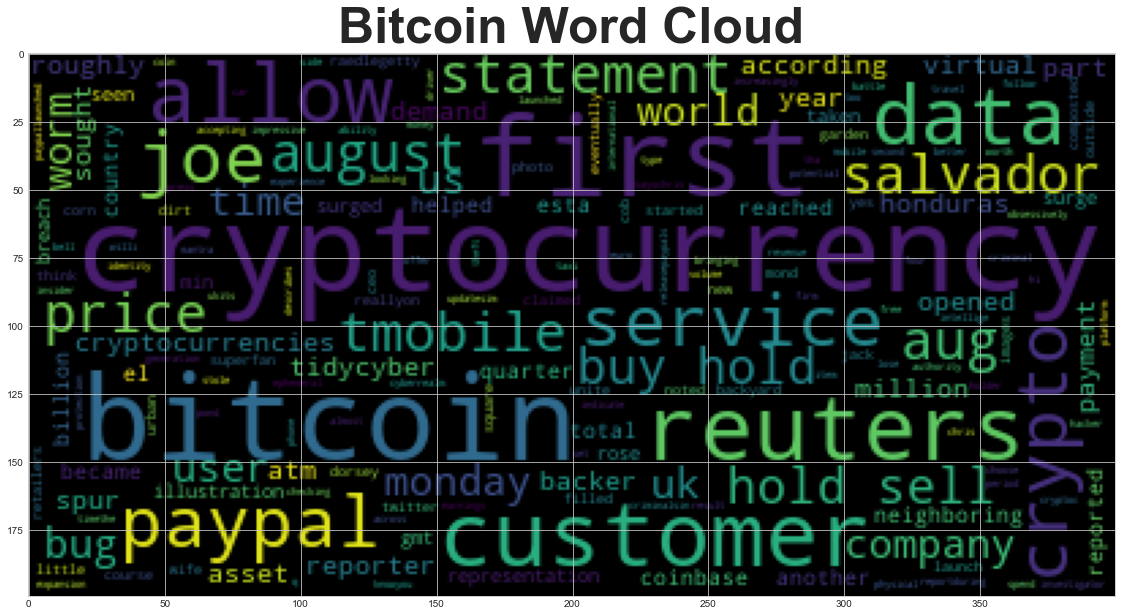

In [45]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

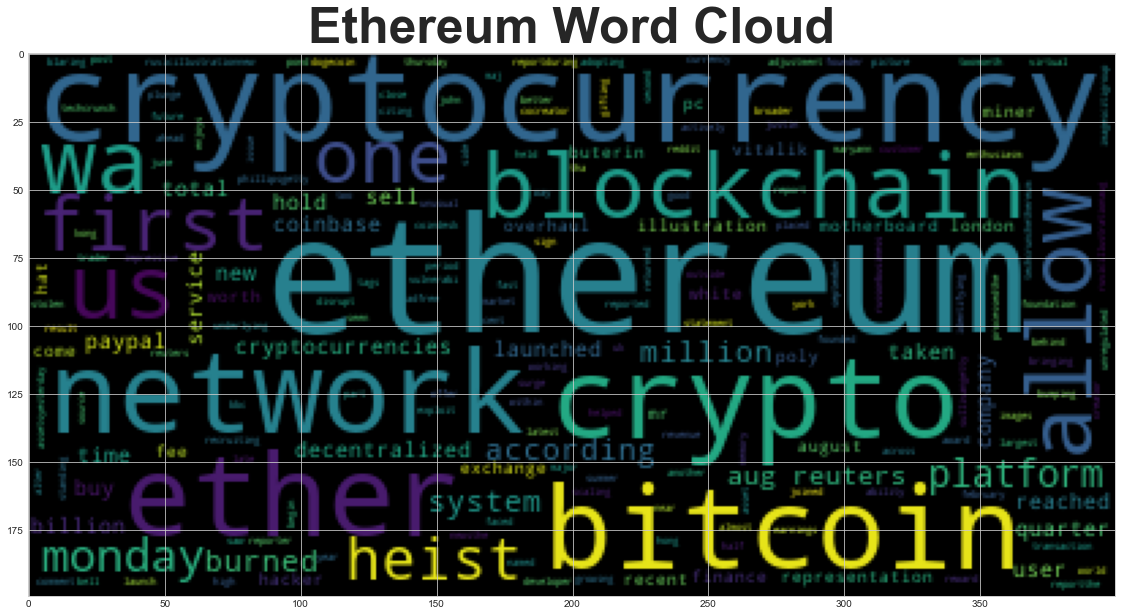

In [46]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("Ethereum Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [47]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [48]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [50]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(bitcoin_df['text'])
btc_content

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars] Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars] Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars] PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a y

In [51]:
# Run the NER processor on all of the text
doc = nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

In [52]:
# Render the visualization
displacy.render(doc, style='ent')

In [53]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Joe Raedle/ PERSON
Twitter PRODUCT
Jack Dorsey PERSON
Bitcoin PERSON
Monday DATE
a year DATE
US GPE
Joe PERSON
Taxi PERSON
Chris PERSON
almost 2,500 CARDINAL
2,100 MONEY
Chris PERSON
Joe PERSON
UK GPE
first ORDINAL
four CARDINAL
two years DATE
roughly 49 million CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
+1733 CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
today DATE
Coinbase WORK_OF_ART
its second quarter DATE
the quarter DATE
Coinbase’s ORG
$2.23 billion MONEY
UKits ORG
first ORDINAL
PayPal PERSON
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
Bitcoin PERSON
August 6, 2021 DATE
Dado Ruvic/IllustrationAug 20 PERSON
Reuters ORG
5.01 % PERCENT
49,106.4 MONEY
22:04 CARDINAL
GMT ORG
Friday DATE
Motherboard PERSON
20, 2021 DATE
PennyStocksBitcoin Price Surge Helped Boost These Penny Stocks ORG
Bitcoin, Dogecoin ORG
Ethereum ORG

---

### Ethereum NER

In [56]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(ethereum_df['text'])
eth_content

"As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized … [+3414 chars] Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars] PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars] PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year after it launched in the US. In a statement, the company said tha… [+850 chars] After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, C

In [57]:
# Run the NER processor on all of the text
doc = nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [58]:
# Render the visualization
displacy.render(doc, style='ent')

In [59]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

2017 DATE
Reddit NORP
Ethereum ORG
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
a year DATE
US GPE
today DATE
Coinbase WORK_OF_ART
its second quarter DATE
the quarter DATE
Coinbase’s ORG
$2.23 billion MONEY
Ethereum ORG
February 3, 2018 DATE
Dado Ruvic PERSON
IllustrationNEW YORK GPE
5 CARDINAL
Reuters ORG
Monday DATE
Poly Network ORG
White Hat PERSON
HONG KONG GPE
Reuters ORG
two-month DATE
Thursday DATE
Bitcoin and Ethereum ORG
June 29, 2021 DATE
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Vitalik Buterin PERSON
2015 DATE
John Phillips PERSON
Vitalik Buterin PERSON
Justin Sullivan/Getty Images PERSON
CoinDesk ORG
two CARDINAL
one CARDINAL
Mary-Ann RussonBusiness PERSON
BBC News ORG
almost half CARDINAL
433 MONEY
Yesterday DATE
LONDON GPE
Reuters ORG
September DATE
UKits ORG
first ORDINAL
PayPal PERSON
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
Solana PERSON
above $100 MONEY
first ORDINAL
Monday DATE
more than 200% PERCENT
August DATE
More than $144 million MONEY
Augus

---